<a href="https://colab.research.google.com/github/giangtr0912/Awesome-Data-Engineering-Content/blob/master/PyML_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

(250, 2) (250,)


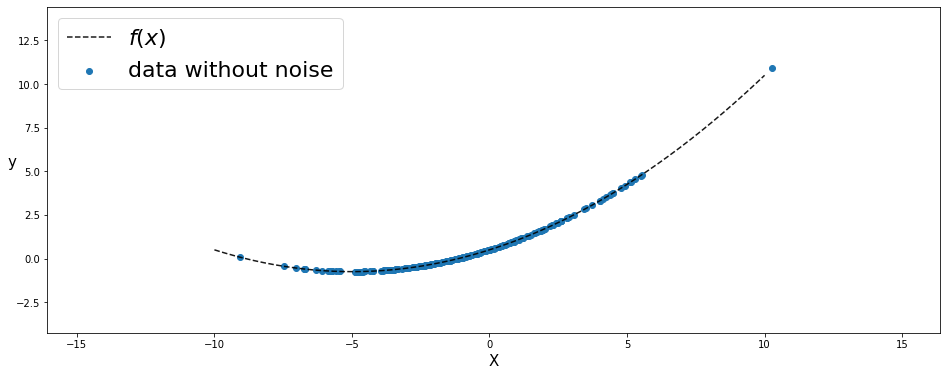

In [ ]:
from numpy.random.mtrand import random_sample
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
N = 250
X = np.random.normal(-1, 3, size=N)

f = lambda x: 0.5 * x + 0.05 * x ** 2 + 0.5

y = f(X)

X = np.c_[(X, np.ones_like(X))]

print(X.shape, y.shape)

X_range = np.linspace(-10, 10, 500)
plt.figure(figsize=(16,6))
plt.scatter(X[:, 0], y, label='data without noise')
plt.plot(X_range, f(X_range), 'k--', alpha=0.9, label='$f(x)$')

plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15, rotation=0);
plt.legend(fontsize=22)
plt.margins(0.3)



(-30.0, 30.0, -30.0, 30.0)

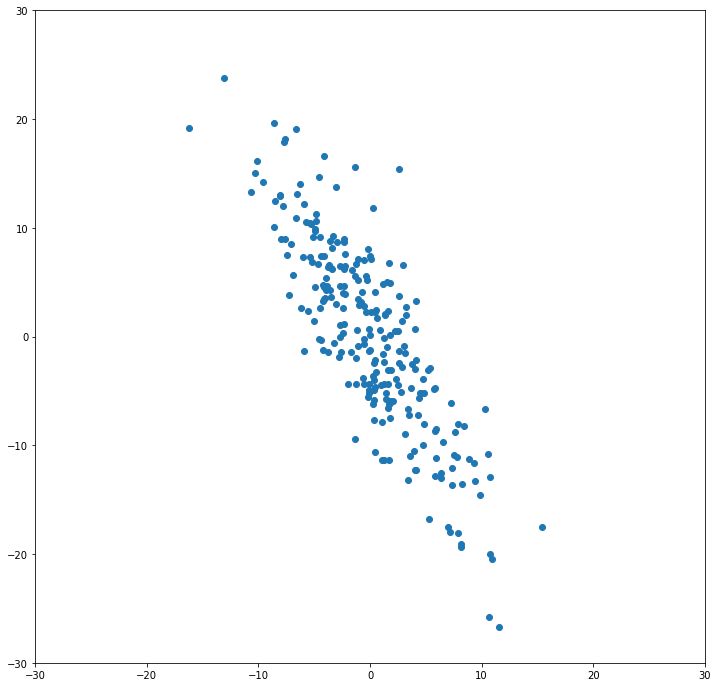

In [ ]:
np.random.seed(42)

N = 250
M = np.random.normal(0, 5, (N, 2))

M[:, 1] -= 1.5 * M[:, 0]
plt.figure(figsize=(12, 12))
plt.scatter(*M.T)

plt.axis([-30, 30, -30, 30])

In [ ]:
M -= M.mean(axis=0)

U, Sigma, V = np.linalg.svd(M, full_matrices=False)

print(Sigma)
print("U shape: ", U.shape)
print("Sigma shape: ", Sigma.shape)
print("V shape: ", V.shape)

X = U @ np.diag(Sigma) @ V.T
assert np.allclose(np.sum(M - X), 0)

[155.77368067  38.53191893]
U shape:  (250, 2)
Sigma shape:  (2,)
V shape:  (2, 2)


In [ ]:
from numpy import random as rnd
import numpy as np

In [ ]:
min_value = -1
max_value = 1

number_of_samples = 256

U = rnd.uniform(min_value, max_value, size = number_of_samples)


In [ ]:
U.mean(), U.var(), U.std()

(0.005828050797379344, 0.3188838326951149, 0.5646980013202764)

In [ ]:
counts,  ranges = np.histogram(U, bins=6)
begins = ranges[:-1]
ends = ranges[1:]
begins, ends

(array([-9.95490722e-01, -6.63445613e-01, -3.31400505e-01,  6.44603405e-04,
         3.32689712e-01,  6.64734820e-01]),
 array([-6.63445613e-01, -3.31400505e-01,  6.44603405e-04,  3.32689712e-01,
         6.64734820e-01,  9.96779929e-01]))

In [ ]:
begins

array([-9.95490722e-01, -6.63445613e-01, -3.31400505e-01,  6.44603405e-04,
        3.32689712e-01,  6.64734820e-01])

In [ ]:
a = [*range(0, 10, 2)]
print(type(a), a)

<class 'list'> [0, 2, 4, 6, 8]


In [ ]:
a = []
for i in range(10):
  a.append(i)

a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
rnd.seed(2334)

def sample_normal(mean, std, n_samples=1000, seed=None):
  if seed is not None:
    rnd.seed(seed)
  X = rnd.normal(loc=mean, scale=std, size=n_samples)
  print(f'Mean: {X.mean():0.3f} Variance: {X.var():.2f} Std: {X.std():.2f}')

  return X


In [ ]:
mean = 2
std = 8
X = sample_normal(mean, std)

Mean: 2.372 Variance: 63.10 Std: 7.94


Mean: 2.008 Variance: 63.71 Std: 7.98


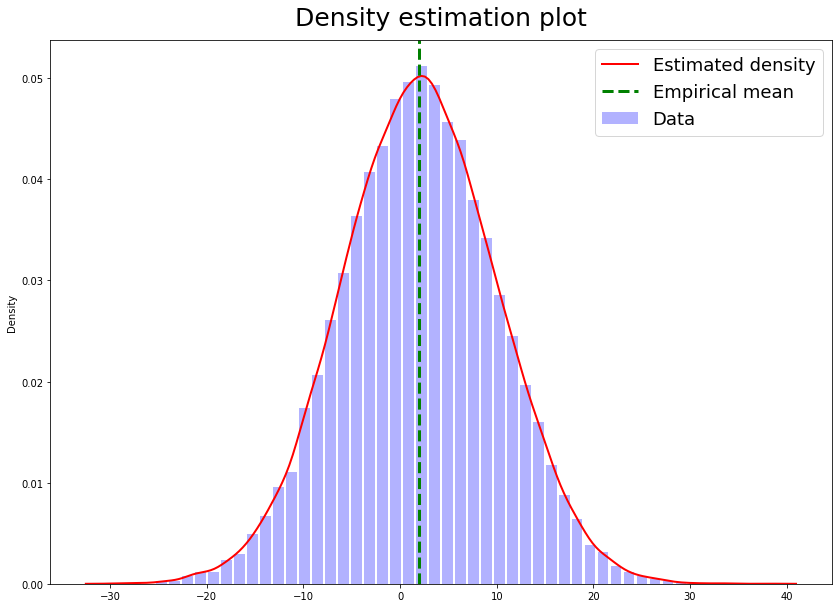

In [ ]:
import matplotlib.pyplot as plt


X  = sample_normal(mean, std, n_samples=256*100, seed=42)

plt.figure(figsize=(14, 10))
nums, borders, _= plt.hist(X, bins=50, density=True, alpha=0.3, rwidth=0.8, color='b', label='Data')

from seaborn import kdeplot
kdeplot(X, linewidth=2, color='r', label='Estimated density')
plt.axvline(X.mean(), ls='--', c='g', label='Empirical mean', linewidth=3)

plt.title('Density estimation plot', fontsize=25, pad=15)
plt.legend(loc='best', fontsize=18)

Text(0.5, 1.0, 'Gaussian histogram plot')

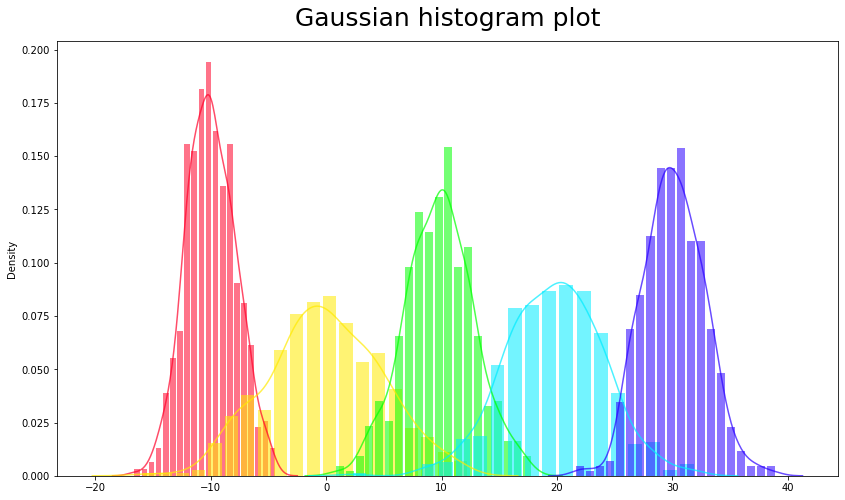

In [ ]:
means = [-10, 0, 10, 20, 30]
stds = [2, 5, 3, 4, 2.5]

assert len(means) == len(stds)

n_clusters = len(means)

fig = plt.figure(figsize=(14, 8))

from matplotlib import cm

cmap = cm.get_cmap('gist_rainbow')
rgba_values = cmap(np.arange(n_clusters)/ n_clusters)

for n in range(n_clusters):
  
  data = rnd.normal(means[n], stds[n], size=500)

  color = rgba_values[n]

  plt.hist(data, bins=20, color=color, alpha=0.55, rwidth=0.8, density=True)
  kdeplot(data, color=color, alpha=0.7)

plt.title('Gaussian histogram plot', fontsize=25, pad=15)